In [1]:
import os
import glob
import pandas as pd 
import numpy as np
from scipy.stats import truncnorm

E:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
extension = 'csv'
result = glob.glob('*.{}'.format(extension))
print(result)

['filtered trips.csv', 'hts07_TPB_hf.csv', 'hts07_TPB_pf.csv', 'hts07_TPB_tf.csv', 'hts07_TPB_vf.csv']


In [3]:
df = pd.read_csv(result[2])
df

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (26,27,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sampn,personid,age,ageg,gend,race,relate,lic,pedis,wkstat,...,volun,vloc,vdays,ffactor,impage,impageg,impgend,imprace,impwkstat,imppedis
0,2100009,210000901,50,6,1,6,0,1,2,0,...,2,-9,-9,130.173584,,,,,,
1,2100009,210000902,50,6,2,6,1,1,2,0,...,2,-9,-9,130.173584,,,,,,
2,2100017,210001701,63,7,2,6,0,1,2,0,...,2,-9,-9,102.763814,,,,,,
3,2100027,210002701,33,4,1,6,0,1,2,0,...,1,1,1,100.045494,,,,,,
4,2100027,210002702,27,4,2,6,1,1,2,0,...,2,-9,-9,100.045494,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25174,2517210,251721001,77,9,2,6,0,1,1,1,...,1,2,1,75.934522,,,,,,
25175,2517226,251722601,42,5,1,6,0,1,2,0,...,2,-9,-9,114.980737,,,,,,
25176,2517226,251722602,41,5,2,6,1,1,2,0,...,1,2,1,114.980737,,,,,,
25177,2517226,251722603,10,1,1,6,2,-9,-9,-9,...,-9,-9,-9,114.980737,,,,,,


In [4]:
df_households = pd.read_csv(result[0])
df_households

,sampn,personid,rtripid,incom,hhsiz,hhstu,hhwrk,hhveh,otaz_tpb,count,income_edited
0,2100009,210000901,2.100009e+10,9,2,0,2,2,1385,5,11.127
1,2100017,210001701,2.100017e+10,6,1,0,1,1,1278,6,5.218
2,2100027,210002701,2.100027e+10,10,2,0,2,2,1278,5,13.897
3,2100056,210005601,2.100056e+10,6,1,0,0,1,1277,4,5.205
4,2100061,210006101,2.100061e+10,6,2,0,0,3,1250,6,5.500
...,...,...,...,...,...,...,...,...,...,...,...
9856,2517108,251710802,2.517108e+10,8,2,0,1,2,1120,4,8.610
9857,2517129,251712901,2.517129e+10,7,2,0,1,1,1139,10,6.890
9858,2517197,251719701,2.517197e+10,7,1,0,1,3,1114,7,6.668
9859,2517210,251721001,2.517210e+10,3,1,0,0,1,1115,3,2.355


In [5]:
df_merged = pd.merge(df, df_households, on='sampn', how='inner')
df_merged

,sampn,personid_x,age,ageg,gend,race,relate,lic,pedis,wkstat,...,personid_y,rtripid,incom,hhsiz,hhstu,hhwrk,hhveh,otaz_tpb,count,income_edited
0,2100009,210000901,50,6,1,6,0,1,2,0,...,210000901,2.100009e+10,9,2,0,2,2,1385,5,11.127
1,2100009,210000902,50,6,2,6,1,1,2,0,...,210000901,2.100009e+10,9,2,0,2,2,1385,5,11.127
2,2100017,210001701,63,7,2,6,0,1,2,0,...,210001701,2.100017e+10,6,1,0,1,1,1278,6,5.218
3,2100027,210002701,33,4,1,6,0,1,2,0,...,210002701,2.100027e+10,10,2,0,2,2,1278,5,13.897
4,2100027,210002702,27,4,2,6,1,1,2,0,...,210002701,2.100027e+10,10,2,0,2,2,1278,5,13.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815,2517210,251721001,77,9,2,6,0,1,1,1,...,251721001,2.517210e+10,3,1,0,0,1,1115,3,2.355
21816,2517226,251722601,42,5,1,6,0,1,2,0,...,251722601,2.517226e+10,7,4,2,2,2,1115,19,6.002
21817,2517226,251722602,41,5,2,6,1,1,2,0,...,251722601,2.517226e+10,7,4,2,2,2,1115,19,6.002
21818,2517226,251722603,10,1,1,6,2,-9,-9,-9,...,251722601,2.517226e+10,7,4,2,2,2,1115,19,6.002


In [7]:
columns_list = ['sampn', 'personid_x', 'rtripid', 'incom', 'hhsiz', 'hhstu', 'hhwrk', 'hhveh', 'otaz_tpb']
df_merged = df_merged[columns_list]
df_merged

,sampn,personid_x,rtripid,incom,hhsiz,hhstu,hhwrk,hhveh,otaz_tpb
0,2100009,210000901,2.100009e+10,9,2,0,2,2,1385
1,2100009,210000902,2.100009e+10,9,2,0,2,2,1385
2,2100017,210001701,2.100017e+10,6,1,0,1,1,1278
3,2100027,210002701,2.100027e+10,10,2,0,2,2,1278
4,2100027,210002702,2.100027e+10,10,2,0,2,2,1278
...,...,...,...,...,...,...,...,...,...
21815,2517210,251721001,2.517210e+10,3,1,0,0,1,1115
21816,2517226,251722601,2.517226e+10,7,4,2,2,2,1115
21817,2517226,251722602,2.517226e+10,7,4,2,2,2,1115
21818,2517226,251722603,2.517226e+10,7,4,2,2,2,1115


In [8]:
trips_count = df_merged.groupby(['sampn']).size()
df_grouped = df_merged.groupby(['sampn'])
df_grouped = df_grouped.first()
df_grouped['count'] = trips_count
df_grouped = df_grouped[~(df_grouped['hhsiz'] < df_grouped['hhwrk'] + df_grouped['hhstu'])]
df_grouped

,personid_x,rtripid,incom,hhsiz,hhstu,hhwrk,hhveh,otaz_tpb,count
sampn,,,,,,,,,
2100009,210000901,2.100009e+10,9,2,0,2,2,1385,2
2100017,210001701,2.100017e+10,6,1,0,1,1,1278,1
2100027,210002701,2.100027e+10,10,2,0,2,2,1278,2
2100056,210005601,2.100056e+10,6,1,0,0,1,1277,1
2100061,210006101,2.100061e+10,6,2,0,0,3,1250,2
...,...,...,...,...,...,...,...,...,...
2517108,251710801,2.517108e+10,8,2,0,1,2,1120,2
2517129,251712901,2.517129e+10,7,2,0,1,1,1139,2
2517197,251719701,2.517197e+10,7,1,0,1,3,1114,1


In [9]:
income_list = [[1,0,1], [2,1,1.5], [3,1.5,3],[4,3,4],[5,4,5],[6,5,6],
 [7,6,7.5],[8,7.5,10],[9,10,12.5],[10,12.5,15],[11,15,20],[12,20,50]]

def get_truncated_normal(mean, sd, low, upp):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

df_grouped['income_edited'] = 0

for i in income_list:
    count_income = df_grouped[df_grouped['incom'] == i[0]].shape[0]
    temp = get_truncated_normal(mean=float(i[1] + (i[2]-i[1])/2), sd=1, low=i[1], upp=i[2])
    temp_list = temp.rvs(count_income)
    temp_list = ['%.3f' % elem for elem in temp_list]
    df_grouped['income_edited'][df_grouped['incom'] == i[0]] = temp_list

df_grouped["income_edited"] = pd.to_numeric(df_grouped["income_edited"])
df_grouped

C:\Users\raga\AppData\Local\Temp\ipykernel_17368\3608368750.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['income_edited'][df_grouped['incom'] == i[0]] = temp_list


,personid_x,rtripid,incom,hhsiz,hhstu,hhwrk,hhveh,otaz_tpb,count,income_edited
sampn,,,,,,,,,,
2100009,210000901,2.100009e+10,9,2,0,2,2,1385,2,10.738
2100017,210001701,2.100017e+10,6,1,0,1,1,1278,1,5.190
2100027,210002701,2.100027e+10,10,2,0,2,2,1278,2,13.474
2100056,210005601,2.100056e+10,6,1,0,0,1,1277,1,5.201
2100061,210006101,2.100061e+10,6,2,0,0,3,1250,2,5.634
...,...,...,...,...,...,...,...,...,...,...
2517108,251710801,2.517108e+10,8,2,0,1,2,1120,2,8.303
2517129,251712901,2.517129e+10,7,2,0,1,1,1139,2,7.427
2517197,251719701,2.517197e+10,7,1,0,1,3,1114,1,6.502


In [10]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
#df_grouped.to_csv('filtered trips.csv')
df_grouped = pd.read_csv('filtered trips.csv')

In [12]:
y = df_grouped['count']
X = df_grouped.drop(['count','rtripid','personid', 'otaz_tpb', 'incom'], axis = 1).reset_index(drop = True)
X

,sampn,hhsiz,hhstu,hhwrk,hhveh,income_edited
0,2100009,2,0,2,2,11.127
1,2100017,1,0,1,1,5.218
2,2100027,2,0,2,2,13.897
3,2100056,1,0,0,1,5.205
4,2100061,2,0,0,3,5.500
...,...,...,...,...,...,...
9856,2517108,2,0,1,2,8.610
9857,2517129,2,0,1,1,6.890
9858,2517197,1,0,1,3,6.668
9859,2517210,1,0,0,1,2.355


In [101]:
df_shk = pd.read_csv('shahre_kord.csv')
df_shk = df_shk[df_shk.Ei != 0].reset_index(drop = True)
df_shk.Inci = df_shk.Inci / 10e5
df_shk = df_shk[df_shk.hhsi<5].reset_index(drop = True)
df_shk.Zone = list(range(1, df_shk.shape[0]+1))
y = df_shk['production']
X = df_shk.drop(['Zone', 'P-Wo', 'P-Sh','production', 'Ci', 'Inci'], axis = 1).reset_index(drop = True)
df_shk

,Zone,P-Wo,P-Sh,Ei,Ci,Inci,Sti,hhsi,production
0,1,182,390,300,0.265,2.943801,199,3.26,572
1,2,390,299,266,0.265,2.943801,127,3.18,689
2,3,1010,695,520,0.209,2.649290,309,3.15,1705
3,4,515,772,439,0.209,2.649290,273,3.08,1287
4,5,216,136,110,0.265,2.943801,67,3.45,352
...,...,...,...,...,...,...,...,...,...
56,57,2134,2109,1105,0.188,2.532398,661,3.29,4243
57,58,2189,1502,1167,0.188,2.532398,595,3.09,3691
58,59,1817,930,1058,0.188,2.532398,726,3.16,2747
59,60,2502,1752,1319,0.188,2.532398,793,3.24,4254


In [102]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_normalized = X.values #returns a numpy array
X_normalized = min_max_scaler.fit_transform(X_normalized)
X_normalized = pd.DataFrame(X_normalized)

In [103]:
X_normalized

,0,1,2
0,0.122844,0.127080,0.410853
1,0.105071,0.072617,0.348837
2,0.237846,0.210287,0.325581
3,0.195504,0.183056,0.271318
4,0.023523,0.027231,0.558140
...,...,...,...
56,0.543649,0.476551,0.434109
57,0.576059,0.426626,0.279070
58,0.519080,0.525719,0.333333
59,0.655515,0.576399,0.395349


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=2)

In [105]:
# make sure to import all of our modules
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# dataframes
import pandas as pd
# computation
import numpy as np
# visualization
import matplotlib.pyplot as plt

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=2)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_train)

In [106]:
y_values = y_train
x_values = x_train

In [107]:
# let's fit the model
#poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

y_pred = np.asarray(y_pred, dtype = 'int')

mean_squared_error(y_values, y_pred, squared=False)

583.7451743453033

In [108]:
regression_model = LinearRegression()

regression_model.fit(x_values, y_values)
regression_model.score(x_test, y_test)

0.8233387293326765

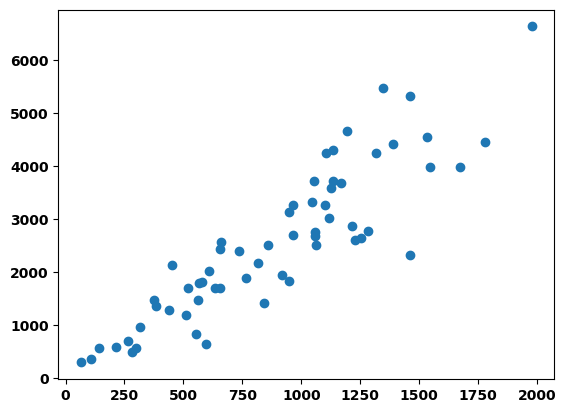

In [94]:
import matplotlib.pyplot as plt


plt.scatter(df_shk.Ei, df_shk.production)
plt.show()

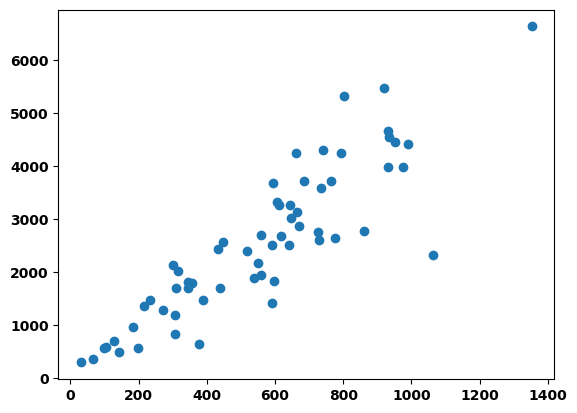

In [97]:
plt.scatter(df_shk.Sti, df_shk.production)
plt.show()

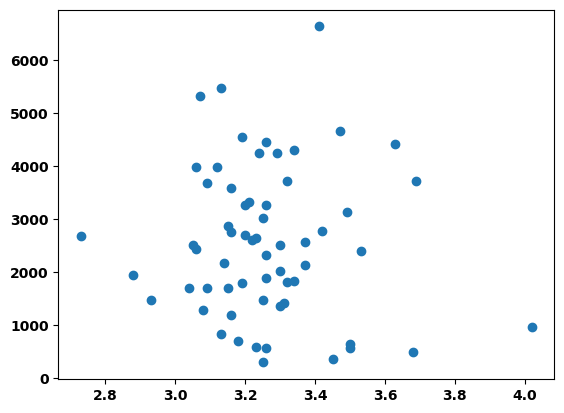

In [98]:
plt.scatter(df_shk.hhsi, df_shk.production)
plt.show()

In [109]:
regression_model.coef_

array([3200.03961081, 2198.41441007,  231.9082086 ])

In [110]:
regression_model.intercept_

198.16679347862691

In [119]:
a = pd.DataFrame(data = {'predict':y_pred,'actual':y_train})
a[abs(a['predict'] - a['actual']) < 750].shape[0]

36

In [120]:
36/61

0.5901639344262295

In [116]:
a.actual.mean()

2519.309523809524

In [32]:
a.actual.max()

42

In [33]:
a.actual.mean()

7.9981164879745

In [26]:
round(a[a['predict'] == a['actual']].shape[0] / a.shape[0], 2)

0.11

In [34]:
round(a[abs(a['predict'] - a['actual']) < 3].shape[0] / a.shape[0], 2)

0.57

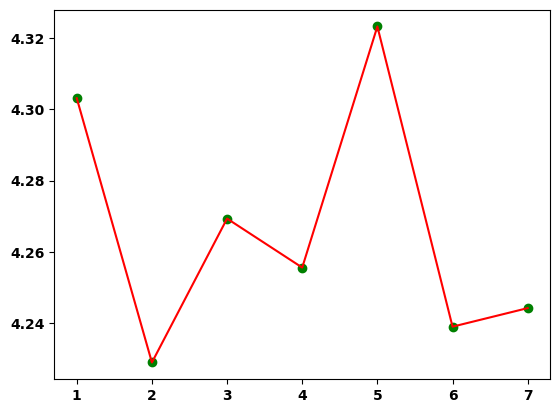

In [18]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)

    poly_x_values = poly_model.fit_transform(x_values)
    #poly_model.fit(poly_x_values, y_values)

    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)

    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 